In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape


(7043, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")



Number of duplicate rows: 0


In [7]:
df.eq(" ").sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)


In [9]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)


In [10]:
total_charge_mean = df['TotalCharges'].mean()
print(total_charge_mean)
df['TotalCharges'].fillna(total_charge_mean, inplace=True)
df.isnull().sum()

2283.3004408418656


C:\Users\Harish23\AppData\Local\Temp\ipykernel_11164\3297189472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(total_charge_mean, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

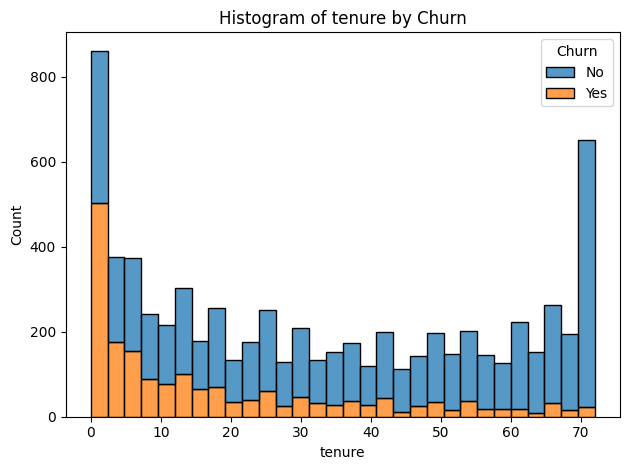

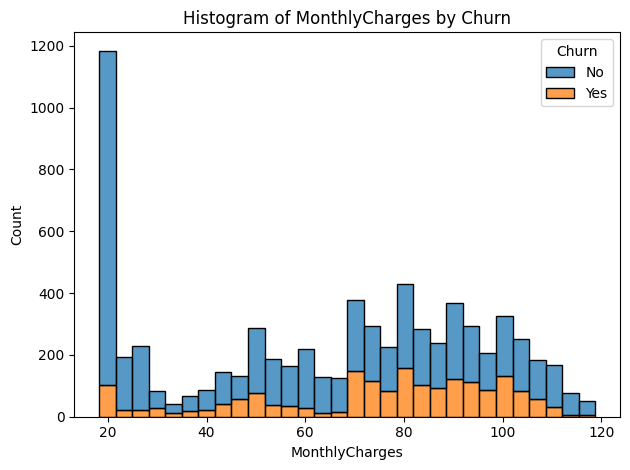

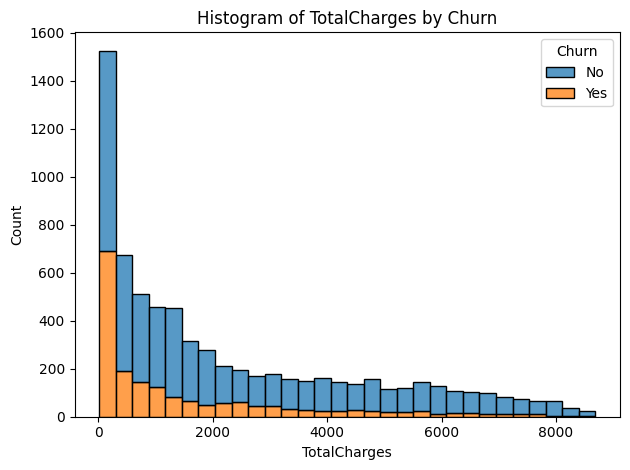

In [11]:

sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title(f'Histogram of tenure by Churn')
plt.xlabel("tenure")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title(f'Histogram of MonthlyCharges by Churn')
plt.xlabel("MonthlyCharges")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30)
plt.title(f'Histogram of TotalCharges by Churn')
plt.xlabel("TotalCharges")
plt.ylabel('Count')
plt.tight_layout()
plt.show()




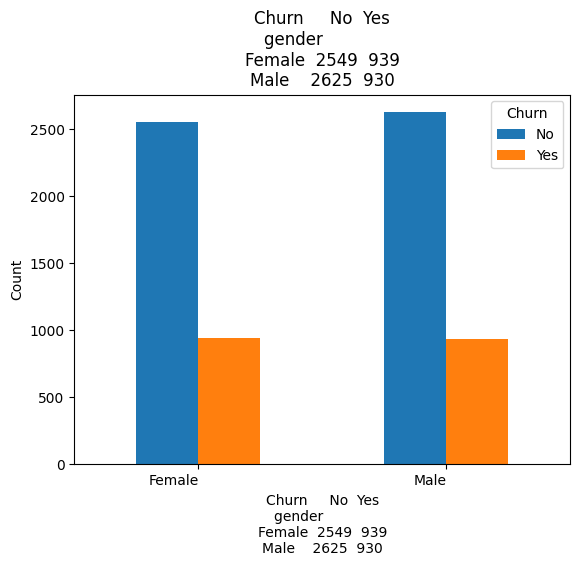

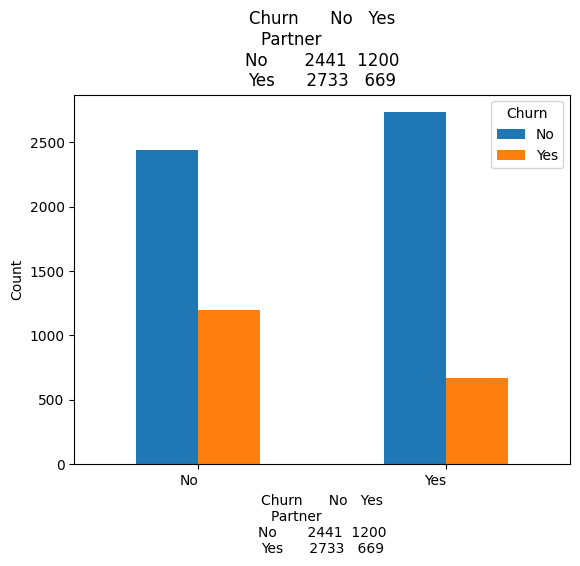

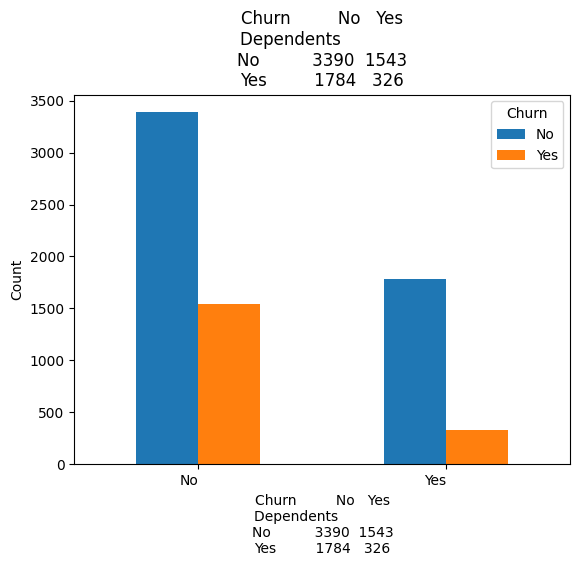

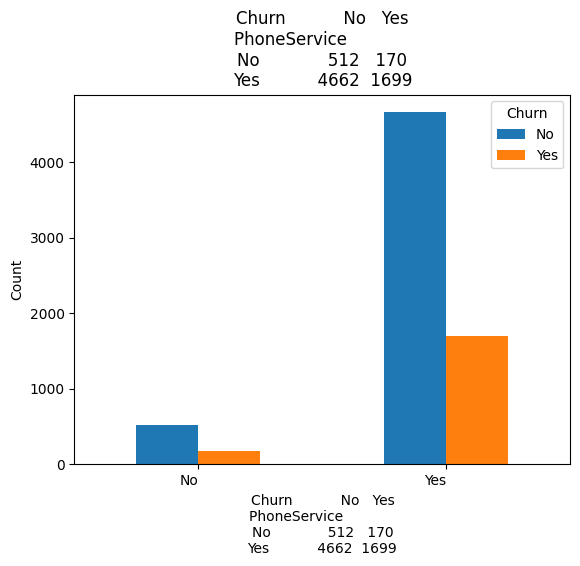

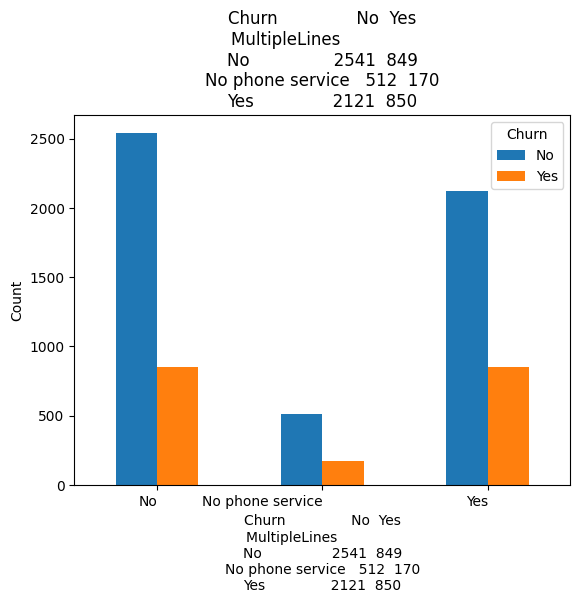

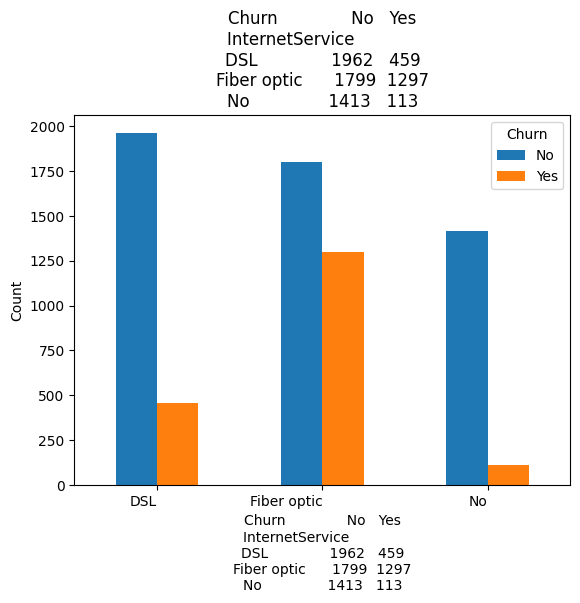

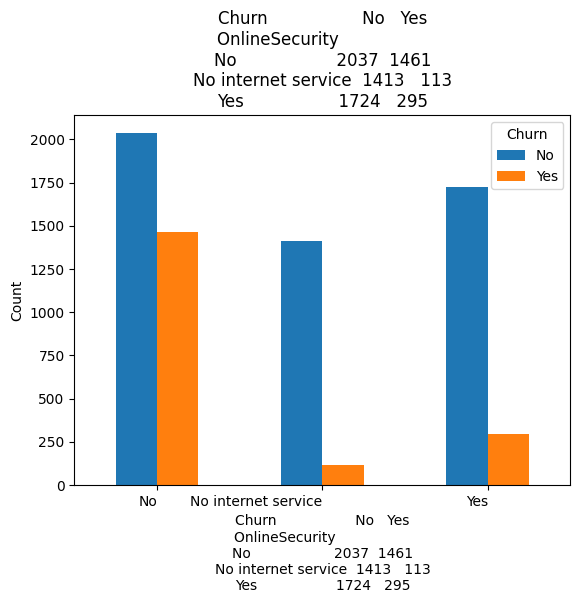

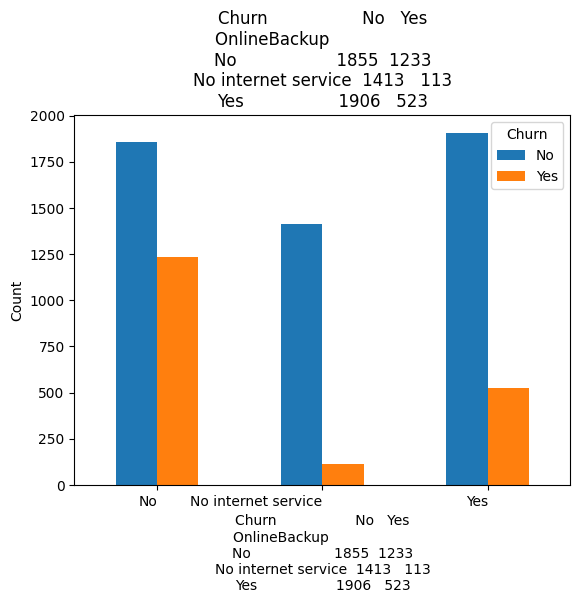

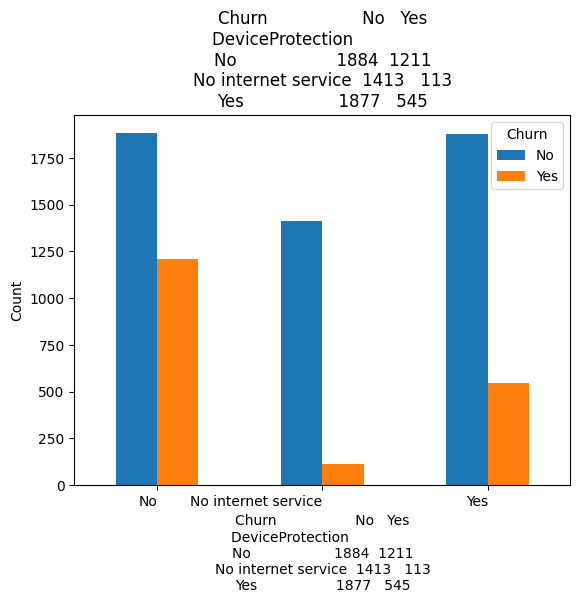

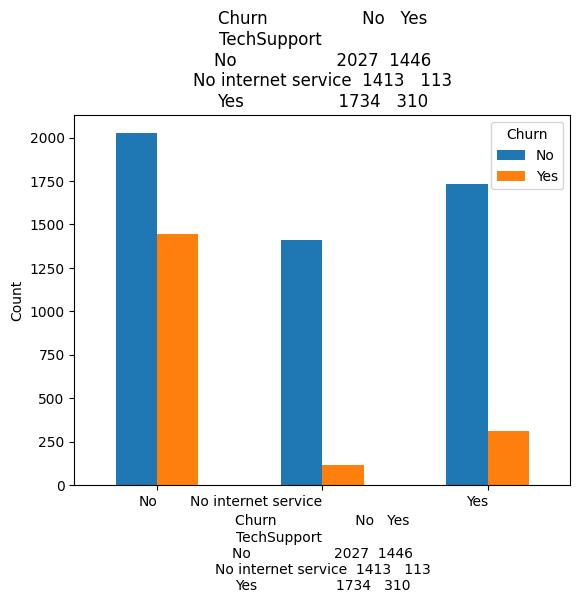

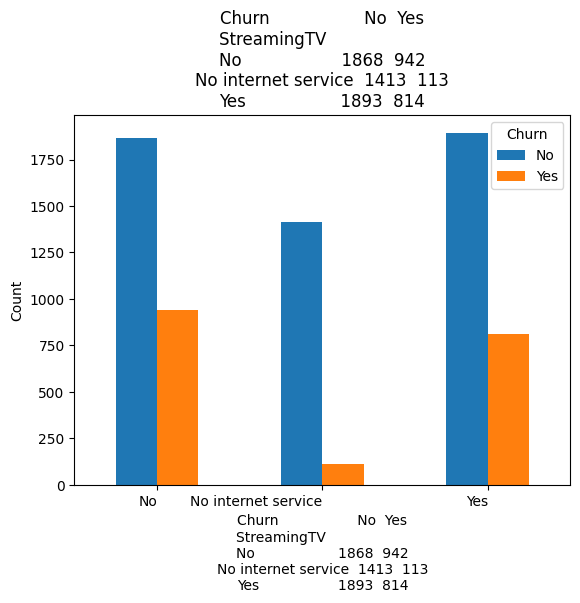

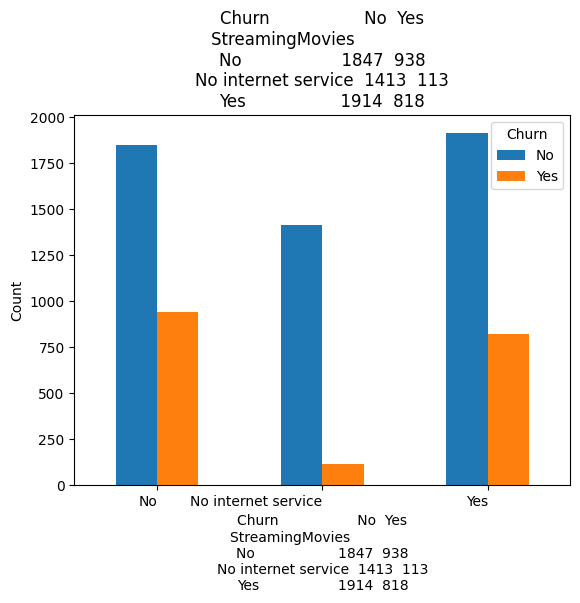

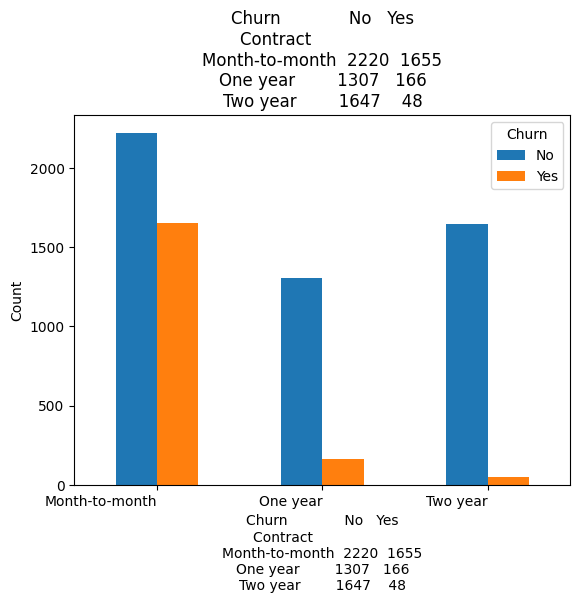

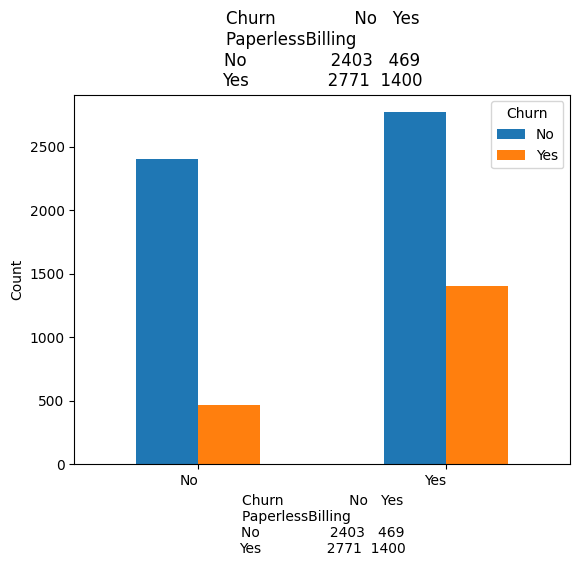

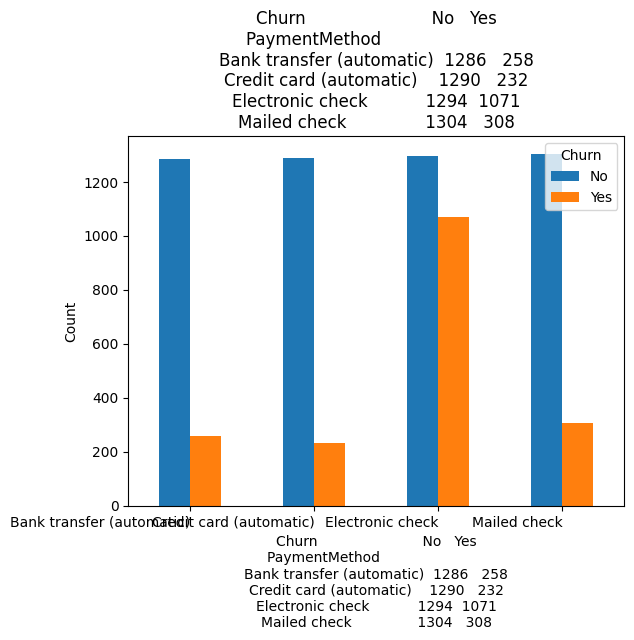

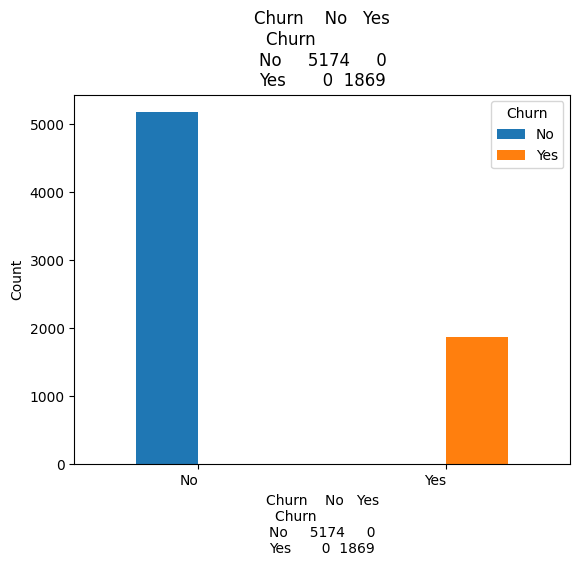

In [13]:
def plot_categorical_data(column):
    column.plot(kind='bar', stacked=False)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0, ha='right')
    plt.legend(title='Churn')
    plt.show()

for column in df.columns:
    if column not in ['customerID','tenure','MonthlyCharges','TotalCharges','SeniorCitizen']:
                churn_counts = df.groupby([column, 'Churn']).size().unstack(fill_value=0)
                plot_categorical_data(churn_counts)


In [14]:
dummy=df.drop(['customerID','SeniorCitizen'],axis='columns')
dummy

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder

for column in dummy.columns:
    if dummy[column].dtype == 'object':  
        le = LabelEncoder()
        dummy[column] = le.fit_transform(dummy[column]) 


In [16]:
dummy

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


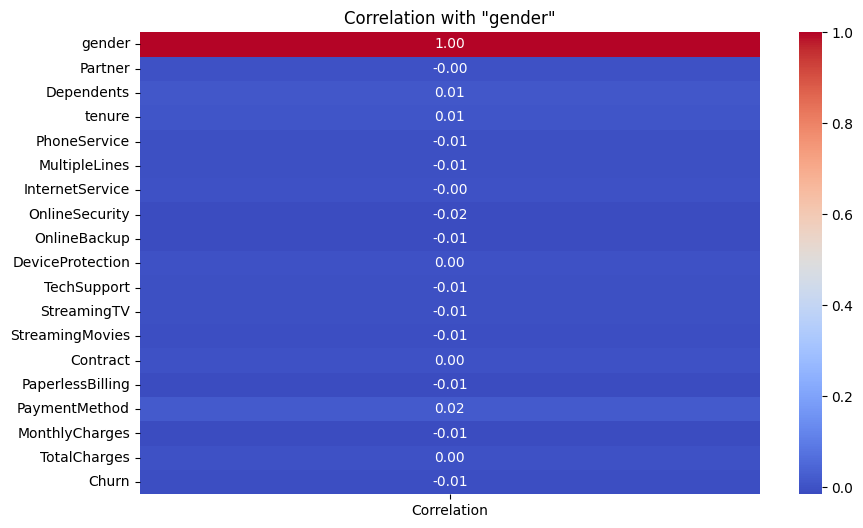

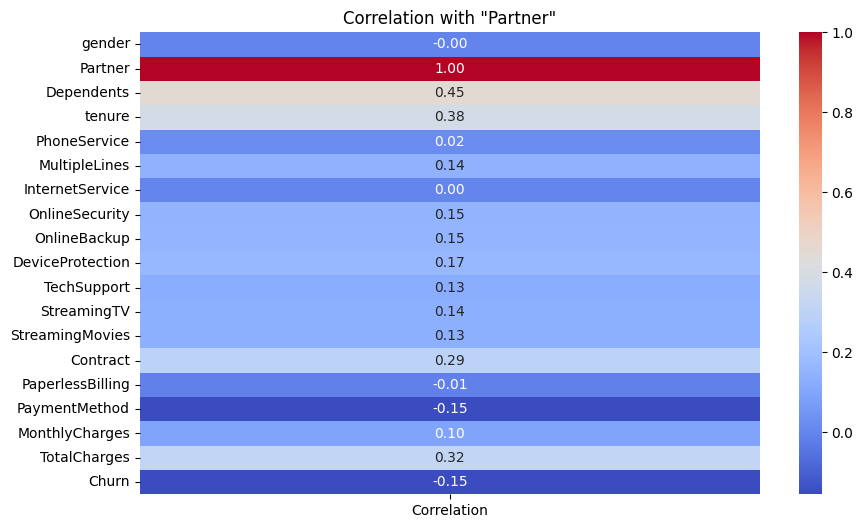

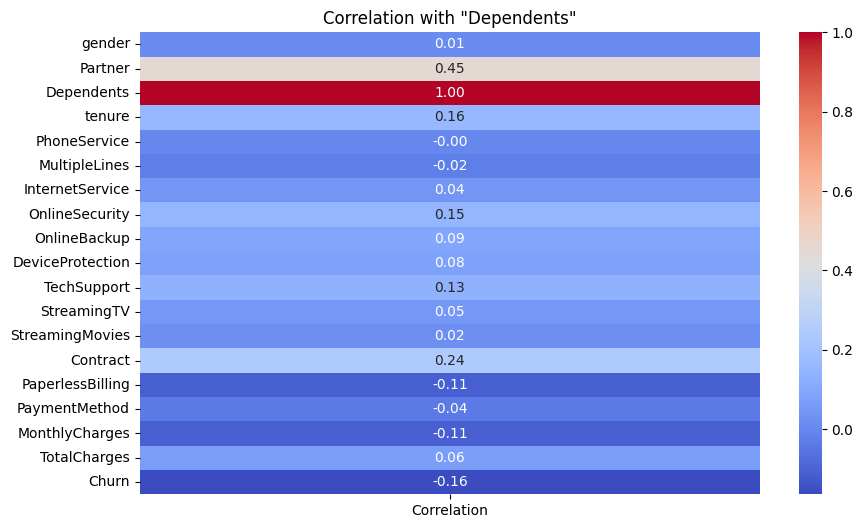

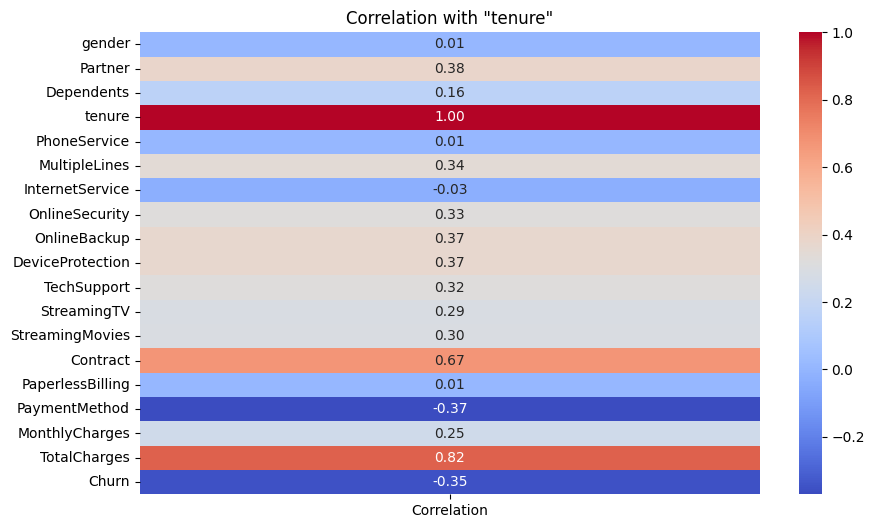

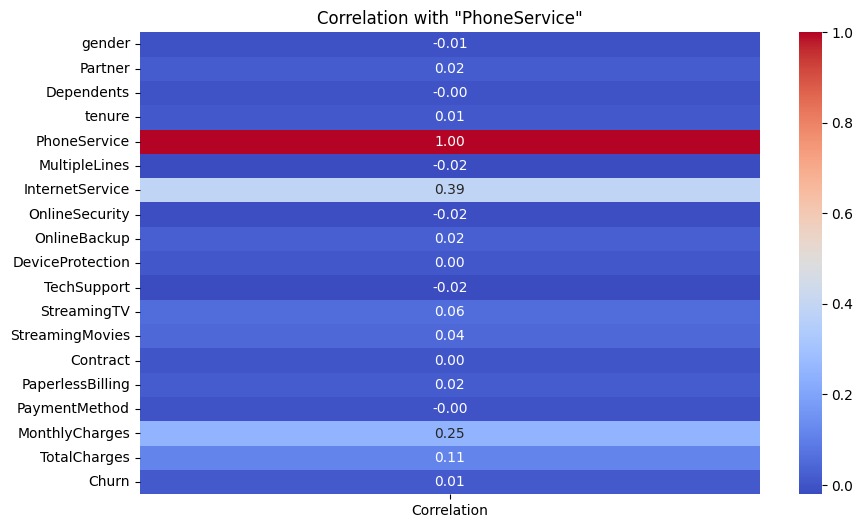

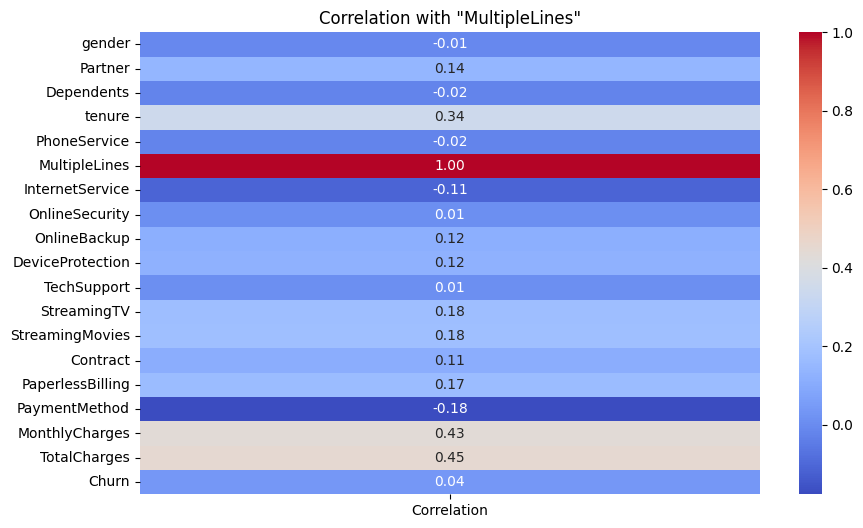

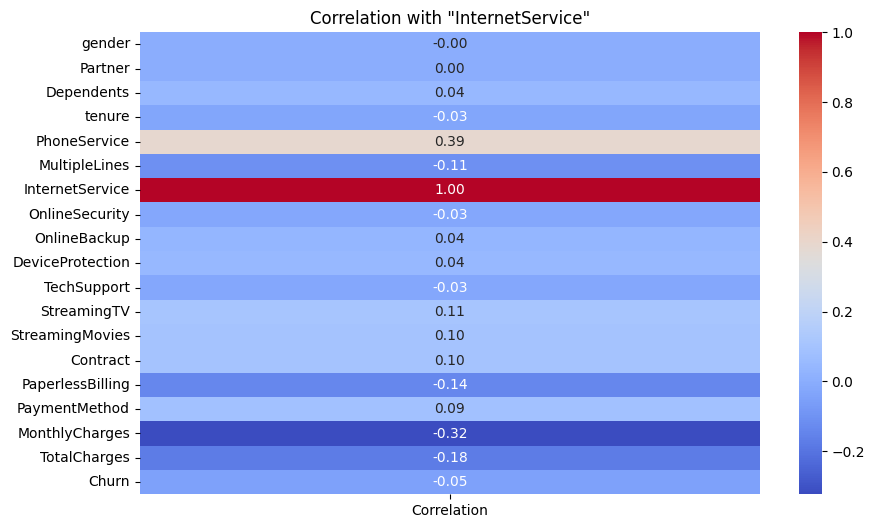

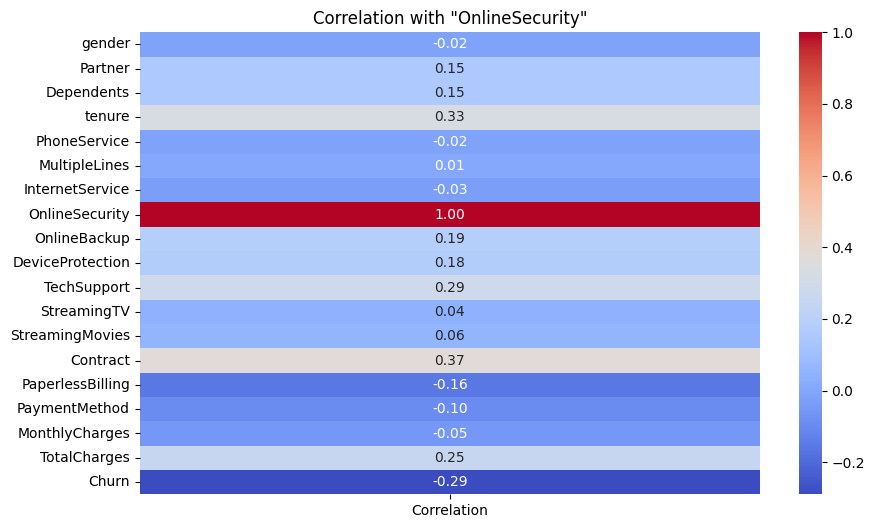

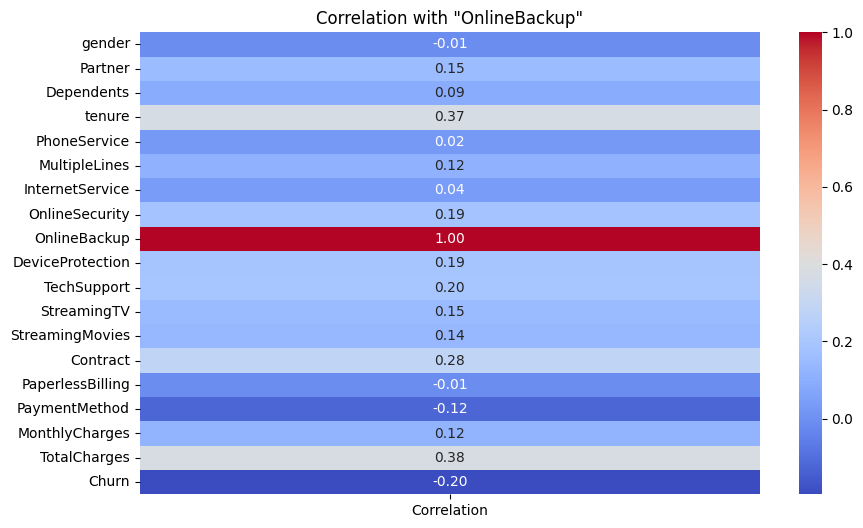

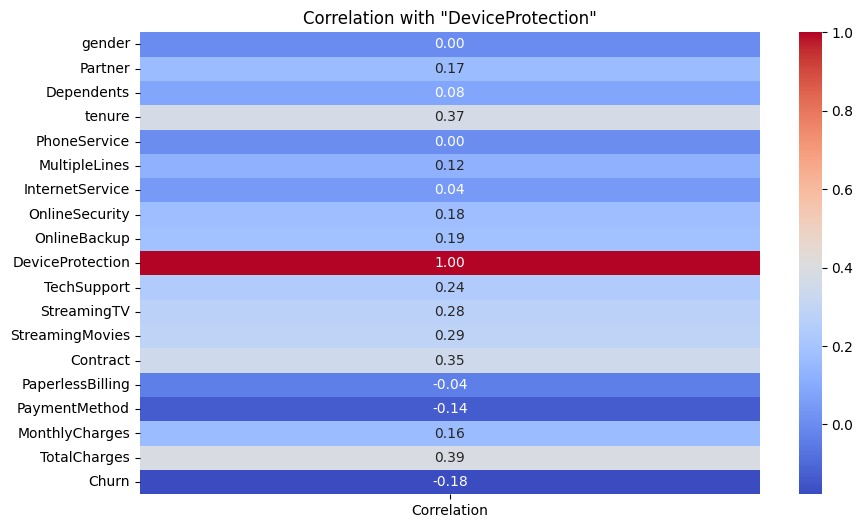

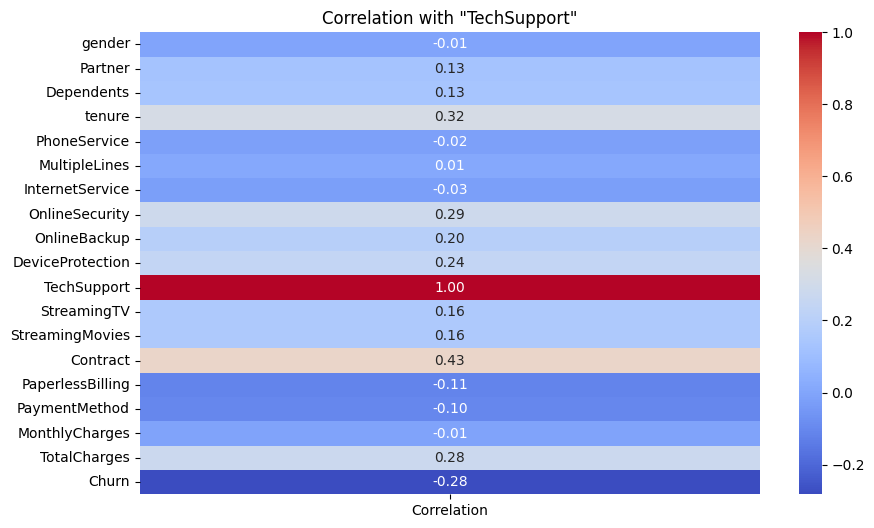

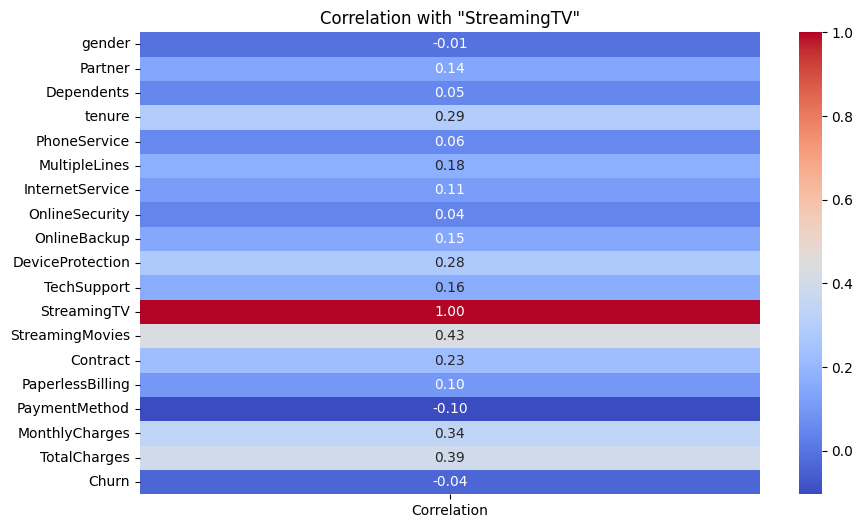

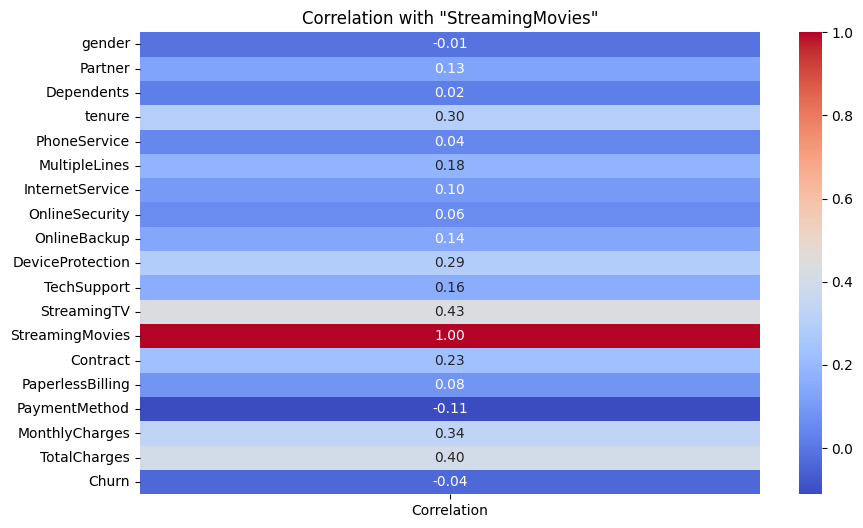

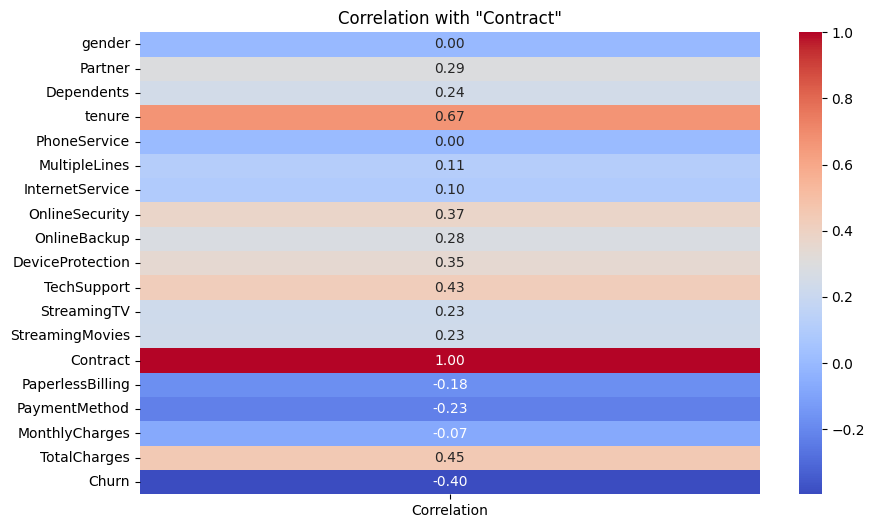

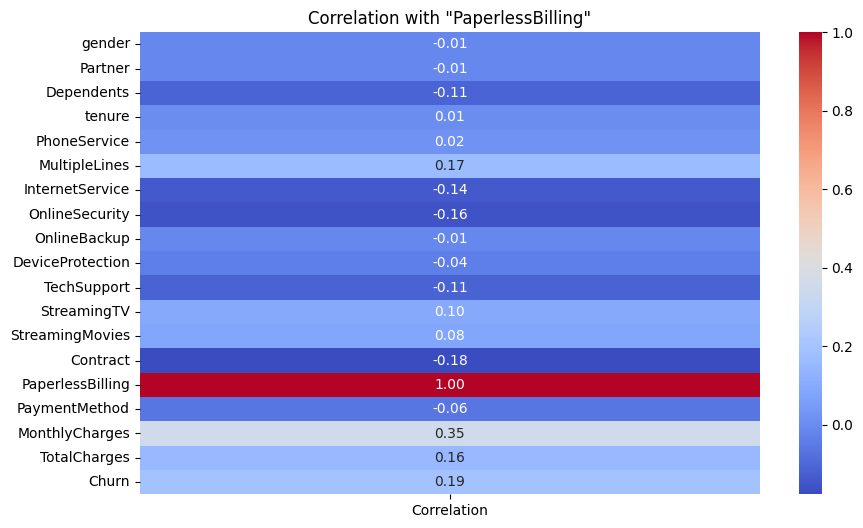

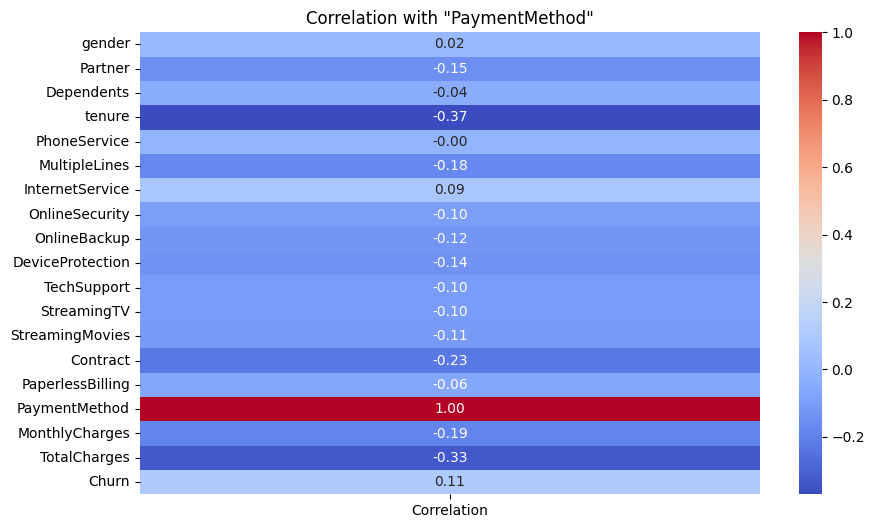

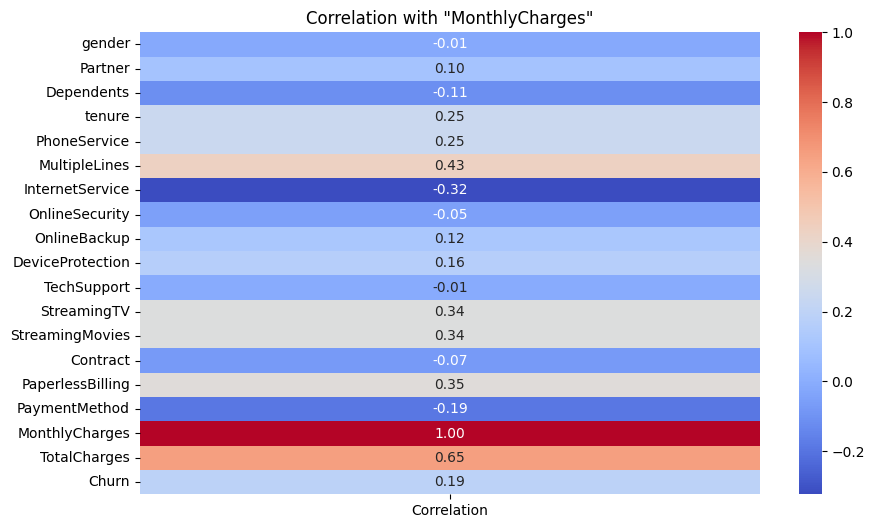

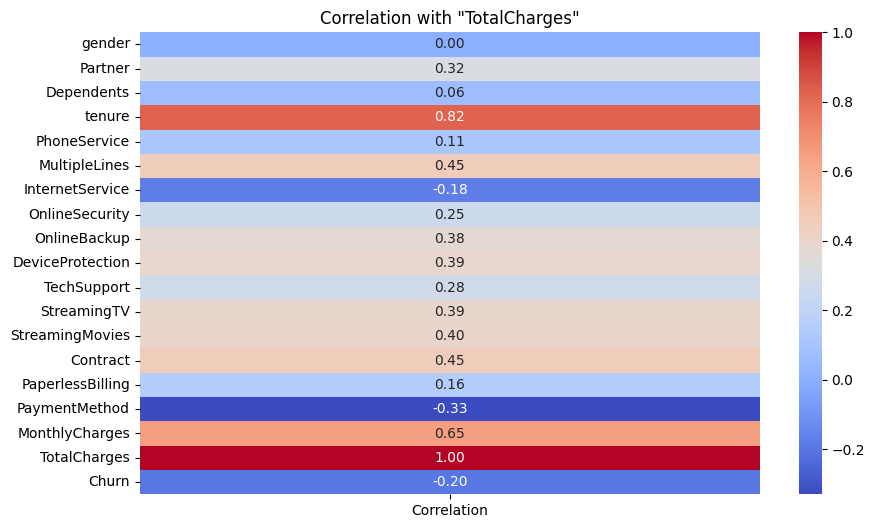

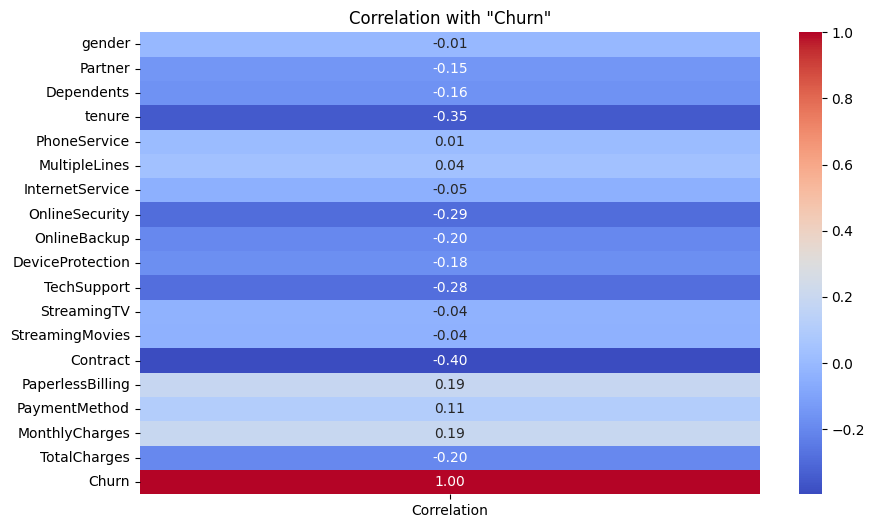

In [17]:
for column in dummy.columns:
    correlation_matrix = dummy.corrwith(dummy[column])    
    correlation_df = pd.DataFrame({'Correlation': correlation_matrix})
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation with "{column}"')
    plt.show()

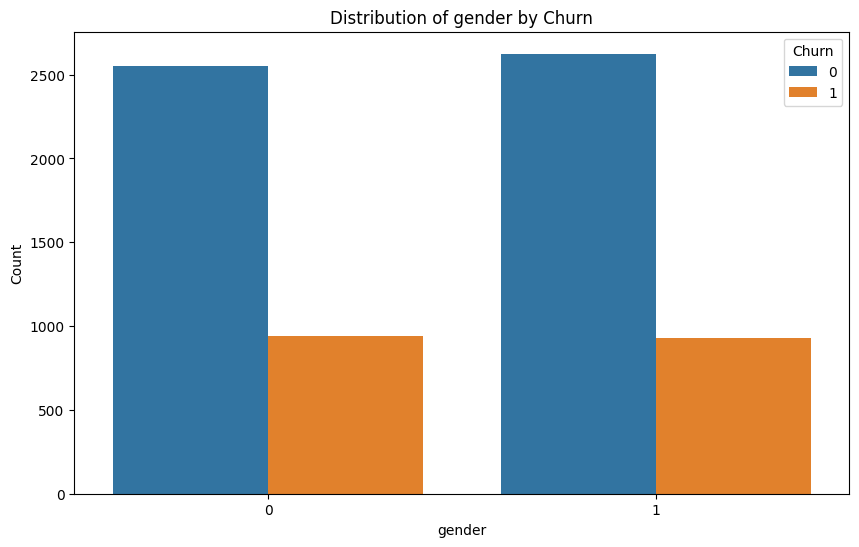

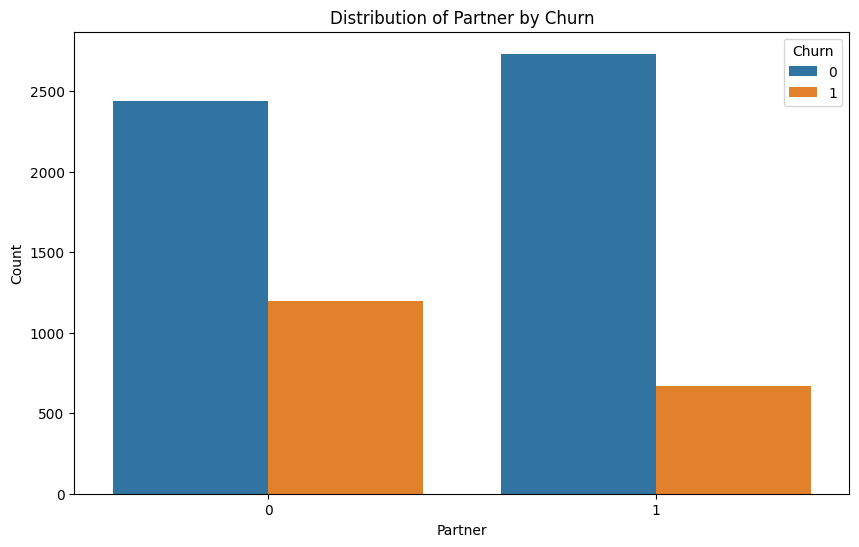

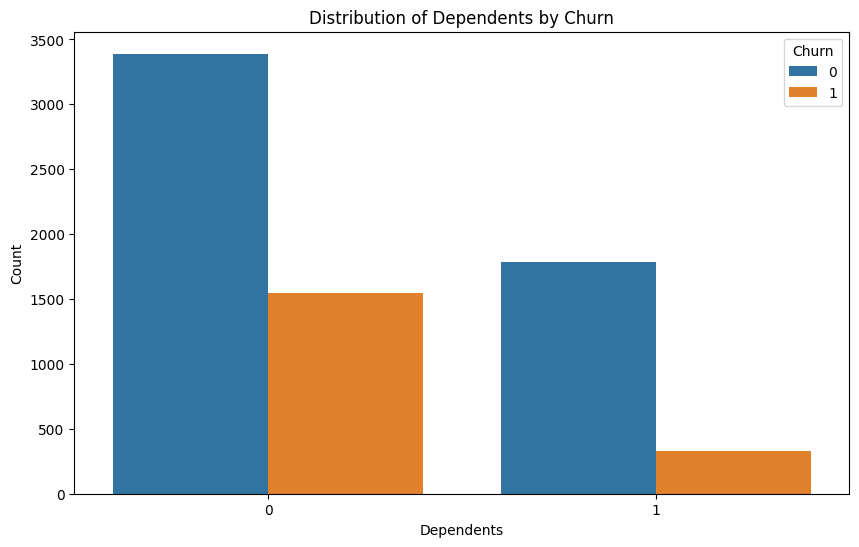

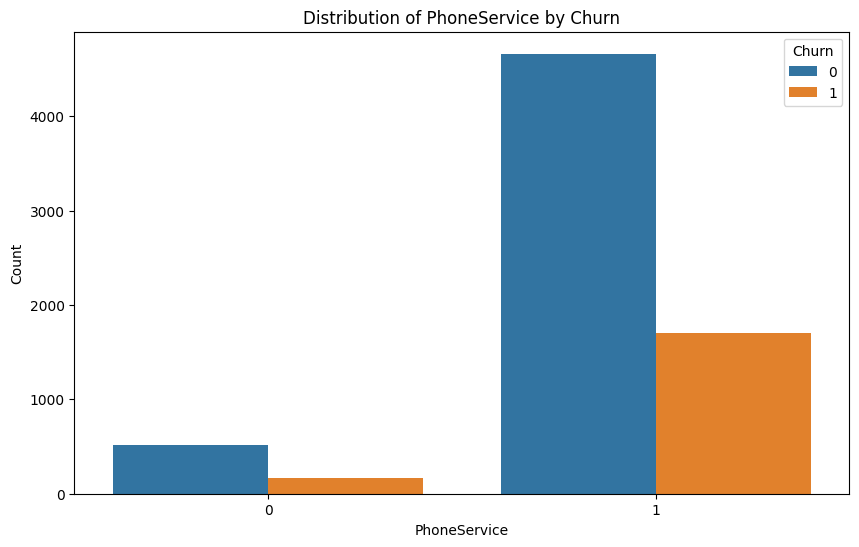

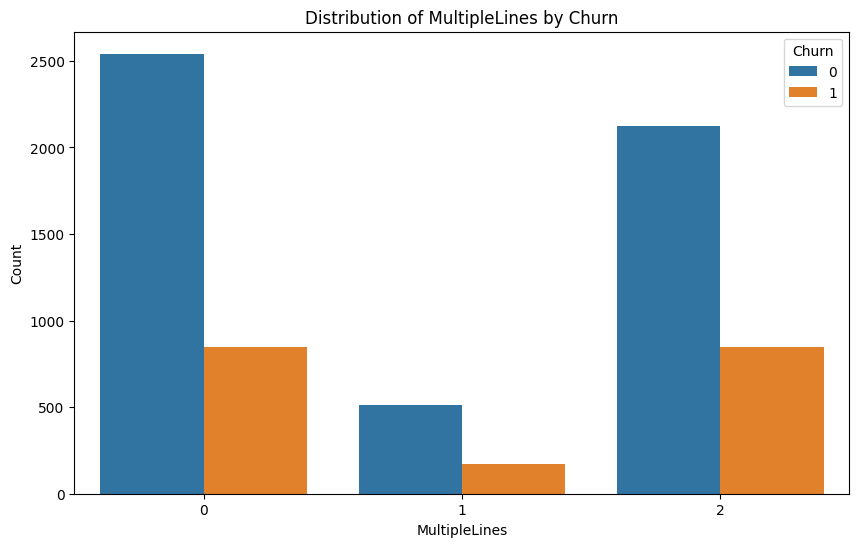

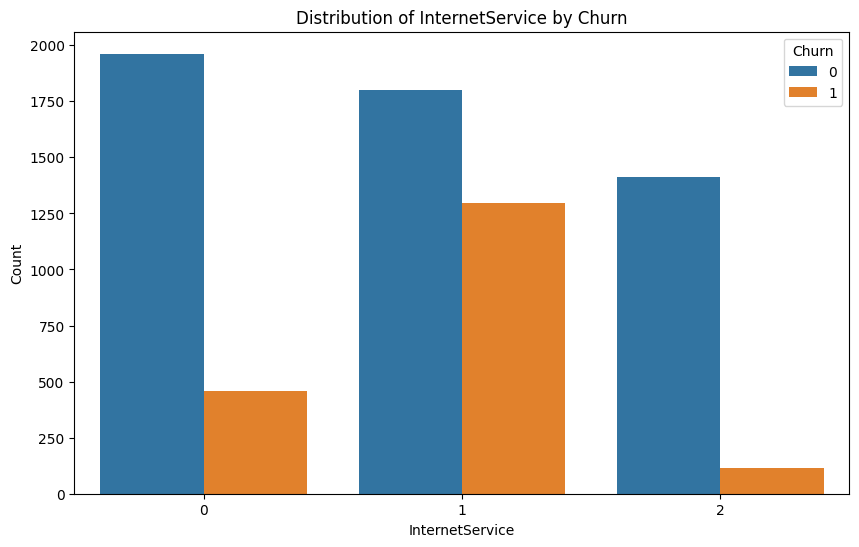

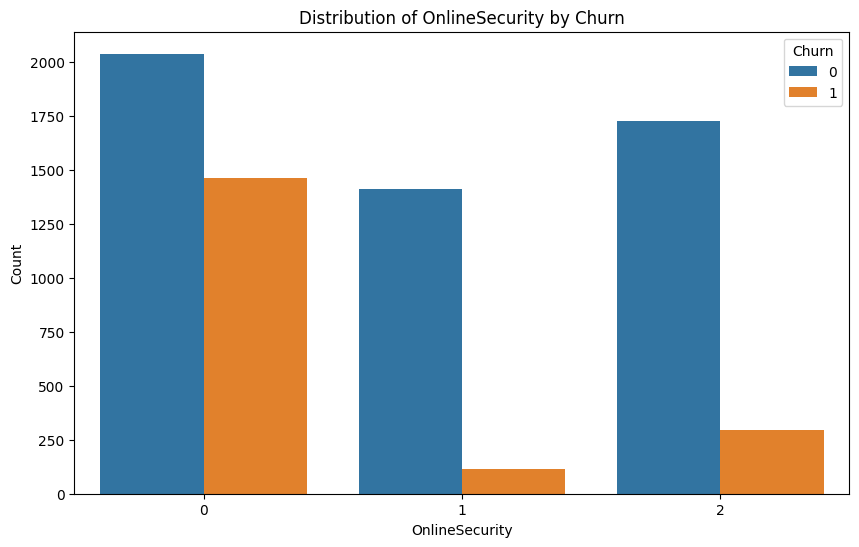

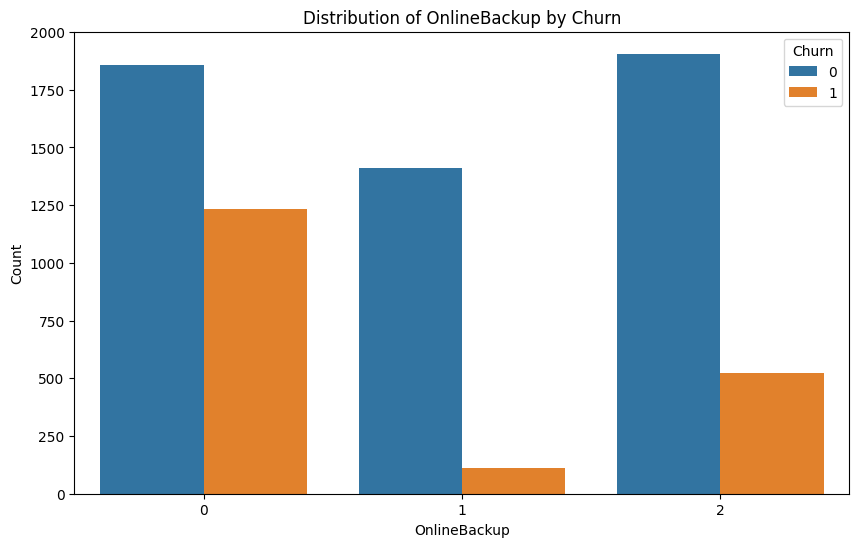

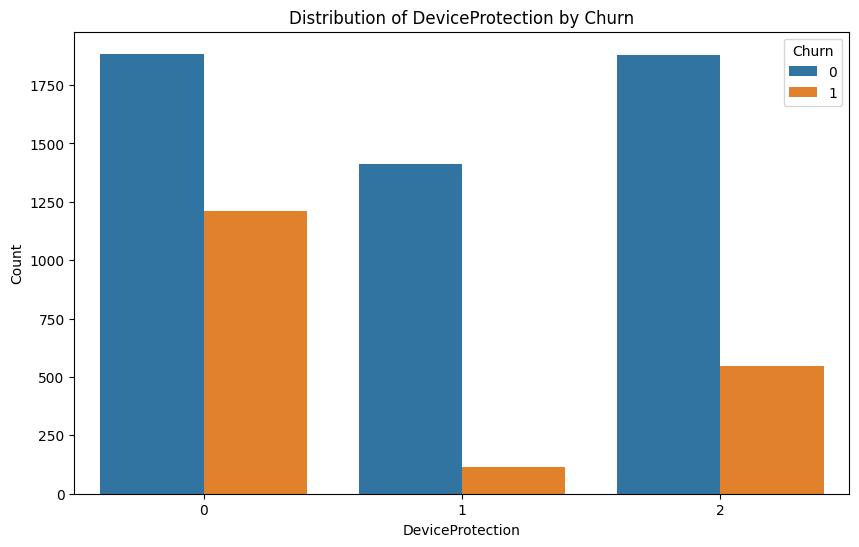

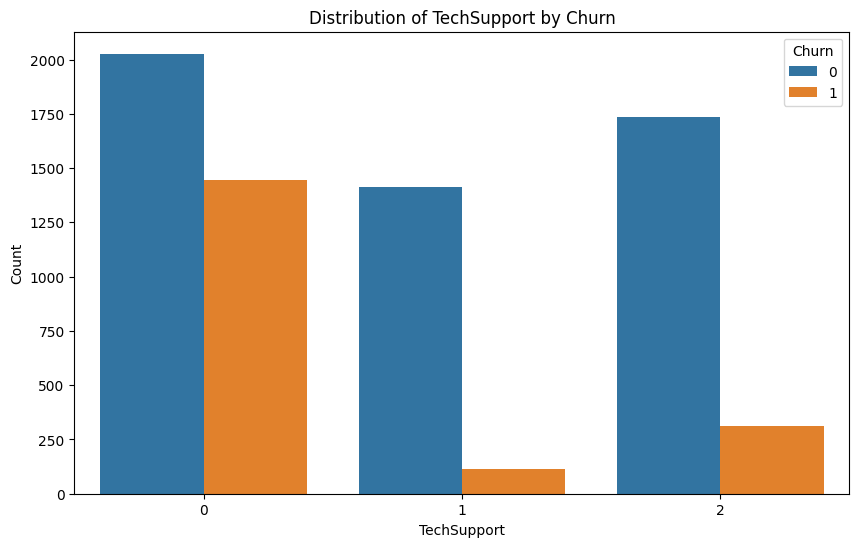

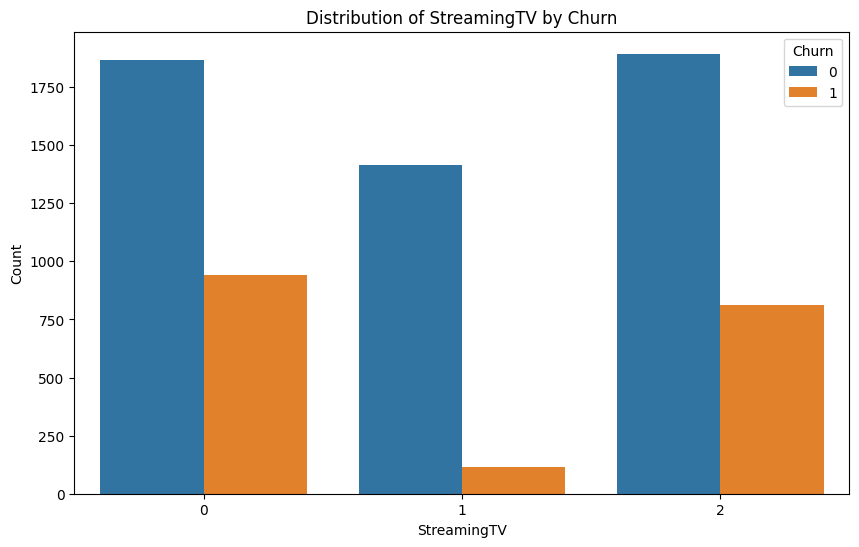

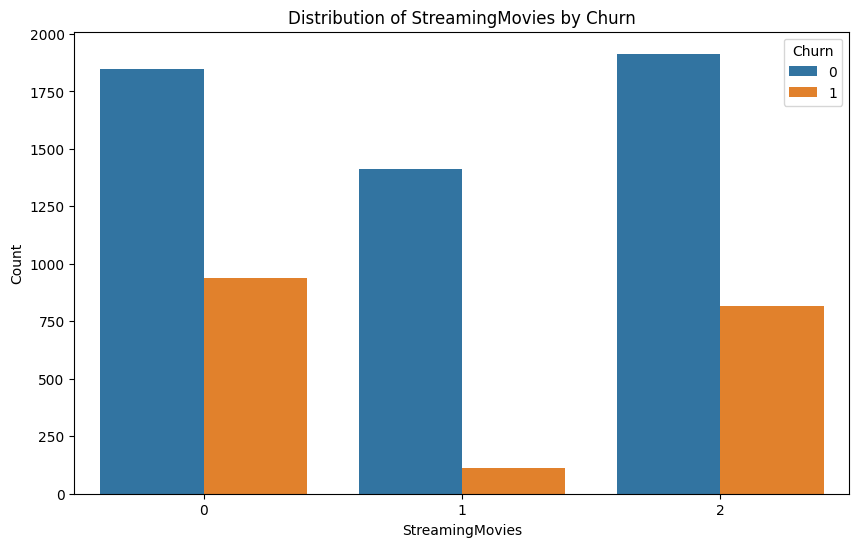

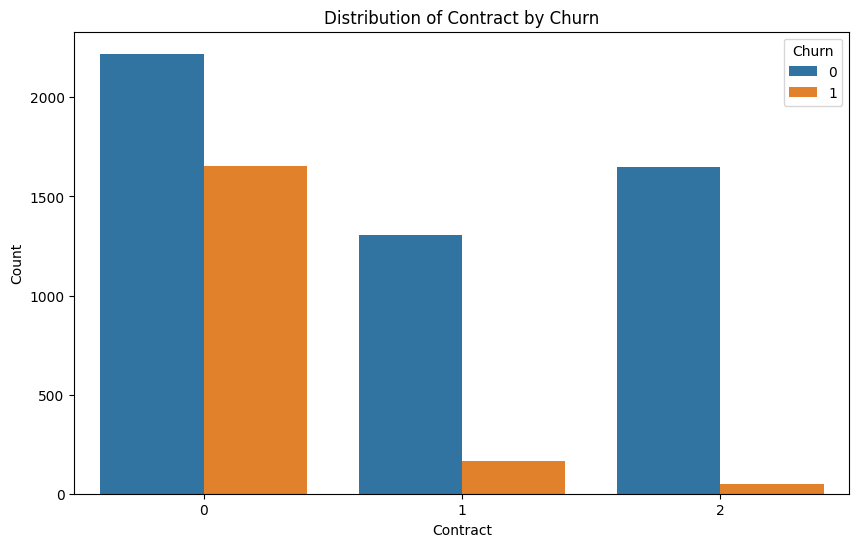

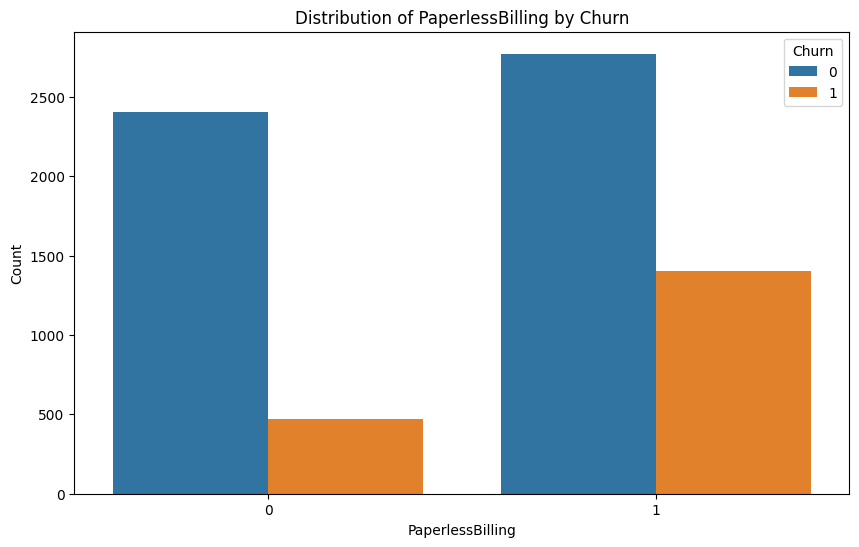

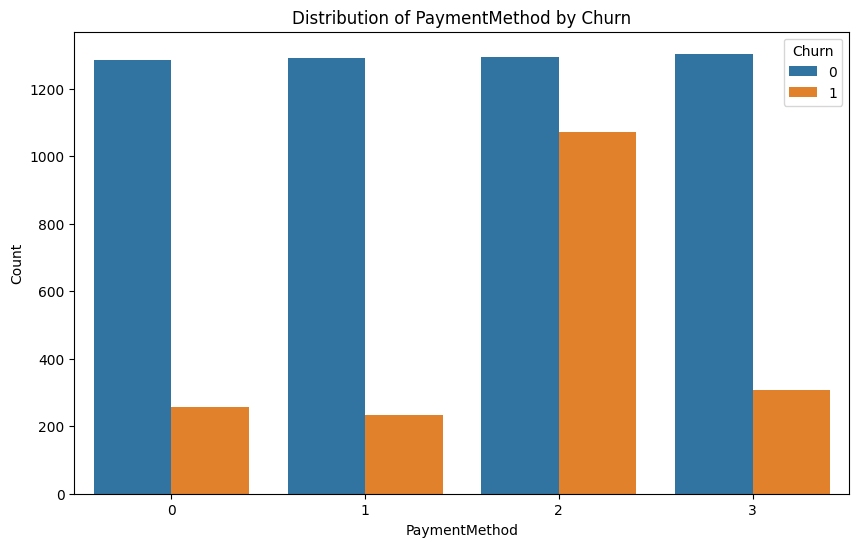

In [18]:
for column in dummy.columns:
    if column not in ['customerID','tenure','MonthlyCharges','TotalCharges','Churn']:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dummy, x=column, hue='Churn')
        plt.title(f'Distribution of {column} by Churn')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Churn')
        plt.show()


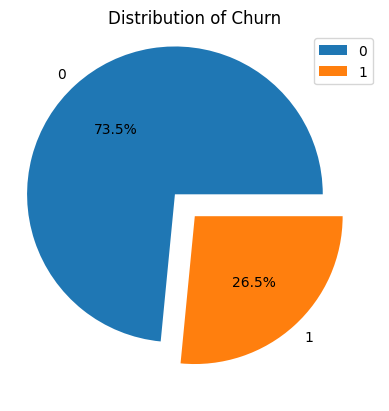

In [19]:
temp = []
for i in list(dummy['Churn'].unique()):
    temp.append(dummy[dummy['Churn'] == i]['Churn'].count())
explode = [0.2,0]
plt.pie(temp,labels = list(dummy['Churn'].unique()), autopct='%1.1f%%',explode=explode)
plt.title('Distribution of Churn')
plt.legend()
plt.show()

In [20]:
from sklearn.feature_selection import mutual_info_classif

x=dummy.drop(columns=['Churn'])
y=dummy['Churn']
mutual_info_scores = mutual_info_classif(x, y)

feature_scores = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mutual_info_scores})
feature_scores = feature_scores.sort_values(by='Mutual Information', ascending=False)


In [21]:
print(feature_scores)


             Feature  Mutual Information
13          Contract            0.090131
3             tenure            0.078473
7     OnlineSecurity            0.066907
10       TechSupport            0.060822
6    InternetService            0.055622
8       OnlineBackup            0.051347
16    MonthlyCharges            0.046768
17      TotalCharges            0.043720
9   DeviceProtection            0.039927
15     PaymentMethod            0.037257
11       StreamingTV            0.030182
12   StreamingMovies            0.026444
1            Partner            0.018486
14  PaperlessBilling            0.017594
2         Dependents            0.012558
5      MultipleLines            0.007720
0             gender            0.004509
4       PhoneService            0.000000


In [22]:
sorted_feature_names = feature_scores.head(15)['Feature'].tolist()



In [23]:
dummy2=dummy[sorted_feature_names]
dummy2

,Contract,tenure,OnlineSecurity,TechSupport,InternetService,OnlineBackup,MonthlyCharges,TotalCharges,DeviceProtection,PaymentMethod,StreamingTV,StreamingMovies,Partner,PaperlessBilling,Dependents
0,0,1,0,0,0,2,29.85,29.85,0,2,0,0,1,1,0
1,1,34,2,0,0,0,56.95,1889.50,2,3,0,0,0,0,0
2,0,2,2,0,0,2,53.85,108.15,0,3,0,0,0,1,0
3,1,45,2,2,0,0,42.30,1840.75,2,0,0,0,0,0,0
4,0,2,0,0,1,0,70.70,151.65,0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,2,0,0,84.80,1990.50,2,3,2,2,1,1,1
7039,1,72,0,0,1,2,103.20,7362.90,2,1,2,2,1,1,1
7040,0,11,2,0,0,0,29.60,346.45,0,2,0,0,1,1,1
7041,0,4,0,0,1,0,74.40,306.60,0,3,0,0,1,1,0


In [38]:
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(dummy2, dummy['Churn'], test_size=0.3)


In [39]:
logis_Reg = LogisticRegression(max_iter=1500)
logis_Reg.fit(X_train_le,y_train_le)
y_pred_le = logis_Reg.predict(X_test_le)
print("Logistic Regression Accuracy:", accuracy_score(y_test_le, y_pred_le))



Logistic Regression Accuracy: 0.8163748225272125


Text(0.5, 23.52222222222222, 'Predicted label')

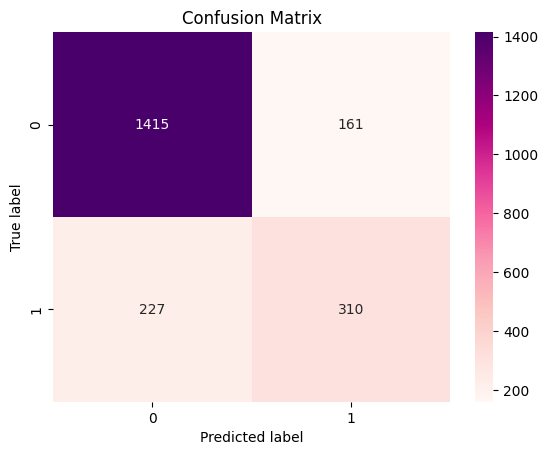

In [40]:
sns.heatmap(confusion_matrix(y_test_le, y_pred_le), annot = True, cmap = 'RdPu', fmt = '0.0f')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [41]:
print(classification_report(y_test_le, y_pred_le))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1576
           1       0.66      0.58      0.62       537

    accuracy                           0.82      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



In [42]:
Rando_Forest = RandomForestClassifier(n_estimators=80,random_state=42)
Rando_Forest.fit(X_train_le,y_train_le)
y_pred_le = Rando_Forest.predict(X_test_le)
print("Random Forest Accuracy:", accuracy_score(y_test_le, y_pred_le))

Random Forest Accuracy: 0.8026502602934217


Text(0.5, 23.52222222222222, 'Predicted label')

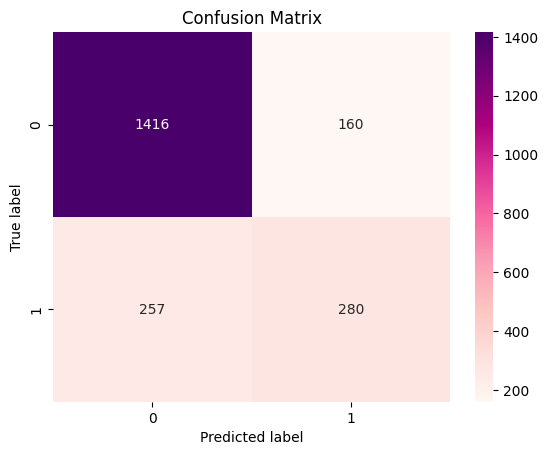

In [43]:
sns.heatmap(confusion_matrix(y_test_le, y_pred_le), annot = True, cmap = 'RdPu', fmt = '0.0f')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [44]:
print(classification_report(y_test_le, y_pred_le))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1576
           1       0.64      0.52      0.57       537

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.80      2113



In [45]:
import xgboost as xgb

In [46]:
XGB_c = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGB_c.fit(X_train_le,y_train_le)
y_pred_le = XGB_c.predict(X_test_le)
print("XGBoost Accuracy:", accuracy_score(y_test_le, y_pred_le))

XGBoost Accuracy: 0.7879791765262659


Text(0.5, 23.52222222222222, 'Predicted label')

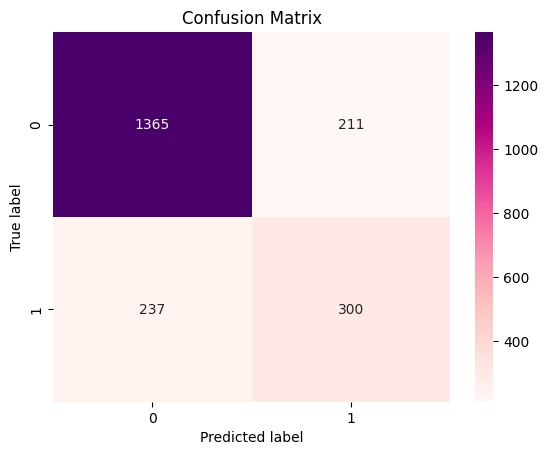

In [47]:
sns.heatmap(confusion_matrix(y_test_le, y_pred_le), annot = True, cmap = 'RdPu', fmt = '0.0f')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [48]:
print(classification_report(y_test_le, y_pred_le))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1576
           1       0.59      0.56      0.57       537

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113

